# Algoritmo de Ford Fulkerson

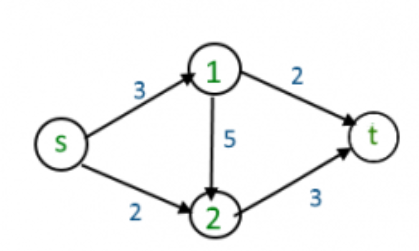

In [90]:
#grafo =    {'s':[['1','3'],['2','2']], '1':[['2', '5'],['t','2']], '2':[['t','3']] }

In [91]:
#residual = {'1':[['s','0']], '2':[['s','0'],['1','0']], 't':[['1','0'],['2','0']]}

In [92]:
grafo_completo = {'s':[['1',3],['2',2]], '1':[['2', 5],['t',2],['s',0]], '2':[['t',3],['s',0],['1',0]], 't':[['1',0],['2',0]]}

In [93]:
grafo_completo

{'s': [['1', 3], ['2', 2]],
 '1': [['2', 5], ['t', 2], ['s', 0]],
 '2': [['t', 3], ['s', 0], ['1', 0]],
 't': [['1', 0], ['2', 0]]}

In [94]:
origen = ['s', 's'] # el primer elemento es en donde estamos y el segundo es el string donde se 
                    # van a acumular los vértices por donde hemos pasado.

In [95]:
destino = 't'

In [96]:
def hijos(grafo, nodo):
    llave = nodo[0]
    movimientos = nodo[1]
    vertices_vecinos = grafo[llave]
    vertices_vecinos_viables = []
    for vertice in vertices_vecinos:
        if vertice[1] != 0:
            vertices_vecinos_viables.append([vertice[0],movimientos+str(vertice[0])])
    return vertices_vecinos_viables

In [97]:
hijos(grafo_completo, origen)

[['1', 's1'], ['2', 's2']]

In [98]:
a = {'0'}

In [99]:
a.add('4')

In [100]:
a

{'0', '4'}

In [101]:
from copy import deepcopy

In [102]:
def busqueda_anchura(Origen, Destino, Grafo):
    frontera = []
    frontera.append(Origen)

    nodos_vistos_antes = set(Origen[0])

    while frontera:

        nodo = frontera.pop(0)

        if nodo[0] == Destino:
            return nodo[1]

        nodos_hijo = hijos(Grafo,nodo)

        for nodo_hijo in nodos_hijo:
            if nodo_hijo[0] not in nodos_vistos_antes:
                frontera.append(nodo_hijo)
                nodos_vistos_antes.add(nodo_hijo[0])
    return False

In [103]:
busqueda_anchura(origen,destino,grafo_completo)

's1t'

In [104]:
def capacidad_minima(grafo, camino):
    capacidades = []
    camino = camino
    for i in range(len(camino)-1):
        vertice_a = grafo[camino[i]]
        for j in range(len(vertice_a)):
            if vertice_a[j][0] == camino[i+1]:
                capacidades.append(vertice_a[j][1])
    return min(capacidades)

In [105]:
capacidad_minima(grafo_completo, '1t')

2

In [106]:
while [8]:
    print(0)
    break

0


In [107]:
while []:
    print(0)
    break

In [108]:
while False:
    print(0)
    break

In [109]:
def actualizar_grafo(Grafo, camino):
    capacidad_camino = capacidad_minima(Grafo, camino)
    camino = camino
    for i in range(len(camino)-1):
        a = camino[i]
        for j in range(len(Grafo[camino[i]])):
            if Grafo[a][j][0] == camino[i+1]:
                Grafo[a][j][1] -= capacidad_camino
                for k in range(len(Grafo[camino[i+1]])):
                    #print(Grafo[camino[i+1]][k][0])
                    if Grafo[camino[i+1]][k][0] == camino[i]:
                        #print('entró')
                        Grafo[camino[i+1]][k][1] += capacidad_camino

In [110]:
grafo_completo = {'s':[['1',3],['2',2]], '1':[['2', 5],['t',2],['s',0]], '2':[['t',3],['s',0],['1',0]], 't':[['1',0],['2',0]]}

In [111]:
actualizar_grafo(grafo_completo, '1t')

In [112]:
grafo_completo

{'s': [['1', 3], ['2', 2]],
 '1': [['2', 5], ['t', 0], ['s', 0]],
 '2': [['t', 3], ['s', 0], ['1', 0]],
 't': [['1', 2], ['2', 0]]}

In [113]:
def contar_flujo(Grafo, Grafo_original, Origen):
    flujo = 0
    for i in range(len(Grafo[Origen])):
        flujo += Grafo_original[Origen][i][1] - Grafo[Origen][i][1]
    return flujo

In [114]:
contar_flujo(grafo_completo, grafo_completo, 's')

0

In [115]:
def Ford_Fulkerson(Origen, Destino, Grafo):
    Grafo_original = deepcopy(Grafo)
    camino_posible = busqueda_anchura(Origen, Destino, Grafo)
    while True:
        camino_posible = busqueda_anchura(Origen, Destino, Grafo)
        #print(camino_posible)
        if not camino_posible:
            break
        actualizar_grafo(Grafo, camino_posible)
        #print(Grafo, contar_flujo(Grafo, Grafo_original, Origen[0]))
        #print()
    return Grafo, contar_flujo(Grafo, Grafo_original, Origen[0])

In [116]:
grafo_completo = {'s':[['1',3],['2',2]], '1':[['2', 5],['t',2],['s',0]], '2':[['t',3],['s',0],['1',0]], 't':[['1',0],['2',0]]}

In [117]:
grafo_solucion, flujo_solucion = Ford_Fulkerson(origen, destino, grafo_completo)

In [118]:
grafo_solucion

{'s': [['1', 0], ['2', 0]],
 '1': [['2', 4], ['t', 0], ['s', 3]],
 '2': [['t', 0], ['s', 2], ['1', 1]],
 't': [['1', 2], ['2', 3]]}

In [119]:
flujo_solucion

5

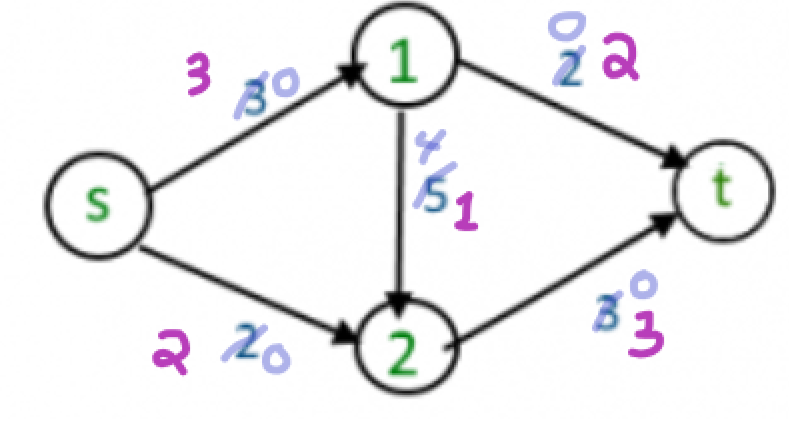

In [120]:
grafo2 = {
    '0':[['1',16],['2',13]],
    '1':[['3',12],['2',10], ['0',0]],
    '2':[['1',4],['4',14], ['0',0],['3',0]],
    '3':[['2',9],['5',20], ['1',0],['4',0]],
    '4':[['3',7],['5',4], ['2',0]],
    '5':[]
}

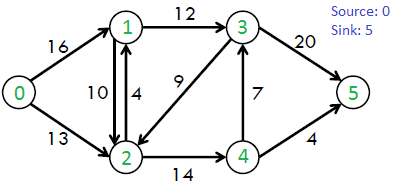

In [121]:
grafo_solucion, flujo_solucion = Ford_Fulkerson(['0','0'], '5', grafo2)

In [122]:
grafo_solucion

{'0': [['1', 4], ['2', 2]],
 '1': [['3', 0], ['2', 10], ['0', 12]],
 '2': [['1', 4], ['4', 3], ['0', 11], ['3', 0]],
 '3': [['2', 9], ['5', 1], ['1', 12], ['4', 7]],
 '4': [['3', 0], ['5', 0], ['2', 11]],
 '5': []}

In [123]:
flujo_solucion

23